# Quantum Query Algorithms

Below are notes from each section of the qiskit course documentation found on this page: https://learn.qiskit.org/course/algorithms/query-algorithms

## Introduction

When considering a single quantum computer versus a classical computer, one of the biggest potential advantage is being able to solve problems _faster_. However, quantum computers do not really provide any advantage regarding memory, or space, compared to classical computers. They also cannot solve problems that classical computers could not solve irrespective of resources required.

This course will introduce an algorithmic framework known as the query model to explore advantages of quantum computers and explain techniqueus of some of the most well-known quantum algorithms.

## The query model of computation

### High-level description

A classical computation usually consists of an input, a computation process, and an output. However, in the query model, our input is not provided in entirety to the computation and is instead made available in the form of a _function_ in which the computation accesses by making _queries_. <font color=orange>The input in this case is often referred to as being an _oracle_ or _black box_, implying that a complete description of it is hidden from the computation</font>. In this course, it will be only focused on binary string values so we can define our inputs generally as follows:

$f : \Sigma^n \Rightarrow \Sigma^m$

for two positive integers n and m where $\Sigma = {0, 1}$ meaning that given a binary string of length n, the function will output a binary string of length m. 

Lastly, we'll measure the efficiency of the query algorithms as the number of queries that are required to solve the problem. While this ignores some other required operations and assumes a unit cost to each query, this simplistic model will work for now.

### Examples of query problems

* OR: The function takes in a binary string of length n and returns a 0 or 1 ($\Sigma$) and the task is to output 1 if there is exists a string for which f(x) = 1 and 0 otherwise. If our input space is represented by $2^n$ bits, then the solution is the OR of all these bits (a single 1 will make it 1 overall).

* Parity: Given a function that takes a binary string of length n and returns 0 or 1, the task is to determine whether there is an even (0) or odd (1) number of strings within the input space that output a 1. Given all $2^n$ bits, the solution is the XOR of all these bits (an even number of 1's will be a 0 whereas an odd number will be a 1).

* Minimum: Given a function that takes the form $f : \Sigma^n \Rightarrow \Sigma^m$, the task is to identify the minimum values of the entire output space by querying the oracle function where the "mimimum" is defined as the first value in lexicogrphaic (i.e. dictionary) ordering (the smallest integer represented by the binary output of length m)

* Unique search: Given a function of the form $f : \Sigma^n \Rightarrow \Sigma$ thhat _promises_ that there is exactly one string $z \in \Sigma^n$ for which $f(z) = 1$ and $f(x) = 0$ for all other strings, find the unique string z.

The last example described above had a special _promise_ on the function whereas the first 3 did not. Some query problems can seem unnatural and undesireable to be solved in any real/practical setting but the point is to illustrate quantum advantages and provide unexpected clues or inspirations for new ideas.

### Query gates

Queries are made by special gates in our circuits called _query gates_. For a quantum circuit, we need our query gate to be a _unitary query gate_ such that we can act on and maintain valid quantum states. This is done by the following: 

![image unitary-query-gate](./unitary-query-gate.png)

where $x \in \Sigma^n$ and $y \in \Sigma^m$ and $y \oplus f(x)$ is the _bitwise exclusive OR_ of strings. In this case, the unitary operation $U_f$ is always going to be a _permutation matrix_ meaning that it is a matrix with a single 1 in each row/column with all other entries being 0 and has the effect of shufflying the entries of a vector.

## Deutsch's algorithm

Deutsch's algorithm solves the parity problem for the special case of n = 1 (the case of $\Sigma \Rightarrow \Sigma$). In this very simple problem, our oracle is either the constant 0 function, the constant 1 function, the identity function, or the bit flip function. Deutsch's problem aims to figure out whether the algorithm is balanced or constant (odd number of 1's such as 01, or even number of 1s such as 11 or 00).

Instead of truth tables, we can represent our oralce function as f(0)f(1) and we want to know whether that output is 00 (constant 0), 11 (constant 1), 01 (identity), or 10 (bit flip). When viewed this way, the solution to the parity problem is the exclusive OR of the two output bits. Clasically, we must query _both_ inputs (f(0) and f(1)) to be certain of the answer so that represents the best case complexity for a classical solution model.

### Quantum circuit description

Deutsch's algorithm can be solved using just a single query to our oracle function and the circuit to do so can be shown below:

![image deutschs-circuit](./Deutsch-circuit-states.png)

### Analysis

Initially we have the states |0> and |1> and apply a Hadamard to both qubits. Thus, at $\pi_1$, we have the following state:

$\ket{\pi_1} = \ket{-}\ket{+} = \frac{1}{2}(\ket{0} - \ket{1})\ket{0} + \frac{1}{2}(\ket{0} - \ket{1})\ket{1}$

which works out to the following possible states: $\frac{1}{2}\ket{00}$, $\frac{1}{2}\ket{01}$, $-\frac{1}{2}\ket{10}$, and $-\frac{1}{2}\ket{11}$ which is what we'd imagine where there is a negative phase from the 1 after applying the hadamard.

Then the $U_f$ is applied next, which in a general sense, does an XOR on the bottom qubit with the output of the function on the top. So we can describe $\pi_2$ as following:

$\ket{\pi_2} = \frac{1}{2}(\ket{0 \oplus f(0)} - \ket{1 \oplus f(0)})\ket{0} + \frac{1}{2}(\ket{0 \oplus f(1)} - \ket{1 \oplus f(1)})\ket{1}$

There is a lot going on in this equation so far but we can simplify it in a few different ways. The first of which (my own way), can be like this:

$\ket{\pi_2} = \frac{1}{2}((\ket{0} - \ket{1}) \oplus f(0))\ket{0} + \frac{1}{2}((\ket{0} - \ket{1}) \oplus f(1))\ket{1}$

This rewrite basically moves the XOR operation outside the parentheses due to its associative/commutative properties. When we write it this way, we can interpret $(\ket{0} - \ket{1}) \oplus f(x)$ as the _distance_ between each query input (0 and 1) and the output of f(x). Since f(x) is either 0 or 1, one of the inputs is going to have a distance of 0 and the other is going to have a distance of 1 so you get the same outputs back as you had inputs but their order might be different so you might have introduced a phase to account for that. Looking again at the equation above, we see that you introduce a phase on the $(...)\ket{0}$ part and a phase on the $(...)\ket{1}$ part. If the phases are the same, its a global phase and we get one answer but if the phases are different, then we can measure a relative phase and get another answer.

While the above is my verbal interpretation of the math, below is a mathematical substitution that can correctly capture what is happening:

$\ket{0 \oplus a} - \ket{1 \oplus a} = (-1)^a(\ket{0} - \ket{1})$

where a = f(x) = 0 or 1. Thus, we can rewrite $\ket{\pi_2}$ like the following:

$\ket{\pi_2} = \frac{1}{2}(-1)^{f(0)}(\ket{0} - \ket{1})\ket{0} + \frac{1}{2}(-1)^{f(1)}(\ket{0} - \ket{1})\ket{1}$<br>
$\ket{\pi_2} = \ket{-}(\frac{(-1)^{f(0)}\ket{0} + (-1)^{f(1)}\ket{1}}{\sqrt{2}})$

where we can do the last simplification by factoring out the common piece in both components, $(\ket{0} - \ket{1})$.

We started with the state $\ket{-}\ket{+}$ and we were told that our operator $U_f$ should not change the $\ket{+}$ qubit (top/right) but our state of $\ket{\pi_2}$ shows that our top/right qubit has been the one to change while the bottom/left qubit has stayed the same ($\ket{-}$). This is known as _phase kickback_.

We can do one more simplification of the above state by pulling out a factor of $(-1)^{f(0)}$ and replacing $f(1) - f(0)$ in the exponent with $f(0) \oplus f(1)$ which is just a special equality for the case of binary exponents of -1:

$\ket{\pi_2} = (-1)^{f(0)}\ket{-}(\frac{\ket{0} + (-1)^{f(0) \oplus f(1)}\ket{1}}{\sqrt{2}})$

We can ignore the factored out $(-1)^{f(0)}$ as a global phase and instead look at the top/right qubit which is currently in the state $\frac{1}{\sqrt{2}}(\ket{0} \pm \ket{1})$ where the $\pm$ depends on whether the exponent is odd or even. When we apply the Hadamard to this qubit, the odd exponent will map to a $\ket{1}$ whereas an even exponent will map to a $\ket{0}$. Thus, measuring this qubit will tell us whether k is odd or even and thus whether the function is at parity or not.

### Further remarks on the phase kickback

The qiskit course goes through some more math here that isn't very illuminating IMO. 

<font color=red>Comment:</font>Some of these operators are introduced in a way that is familiar to us in the classical world. For example, the CNOT flips the target bit if the control bit is 1 and otherwise not. In a computer science perspective, there is nothing wrong with that statement; rather is it something we're very comfortable with. But as a physicist, this is something that should feel strange because in a closed system where energy/information is conserved, we should know that there will never be these 1-sided operations...for every action, there is always a reaction. Therefore, while we observe it in a classical dimension as described above, it seems more appropriate that we understand how these multiple qubit gates will always impose some (hidden or not) effect on both qubits.

### Implementation

In [1]:
from qiskit import QuantumCircuit

def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in [1,2,3,4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2,3]:
        f.cx(0, 1)
    if case in [3,4]:
        f.x(1)
    return f

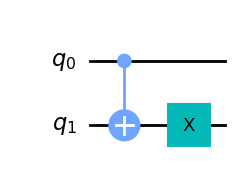

In [2]:
deutsch_function(3).draw()

In [3]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits-1
    qc = QuantumCircuit(n+1, n)

    qc.x(n)
    qc.h(range(n+1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

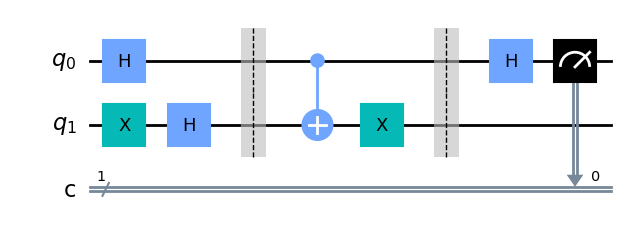

In [4]:
compile_circuit(
    deutsch_function(3)
).draw()

In [5]:
from qiskit_aer import AerSimulator

def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = compile_circuit(function)
    
    result = AerSimulator().run(qc,shots=1,memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == '0':
        return "constant"
    return "balanced"

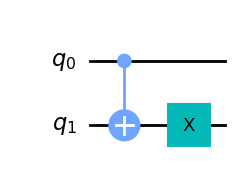

'balanced'

In [6]:
f = deutsch_function(3)
display(f.draw())
deutsch_algorithm(f)

<font color=red>Question:</font> Is it coincidence that the circuits that have CNOTs are the balanced ones and the ones without a mult-qubit gate are the constant functions? Or is that another example of the encoding on the problem tends to reveal the solution as we discussed with Grovers search?

## The Deutsch-Jozsa algorithm

The Deutsch-Jozsa algorithm can be used to solve a couple different query problems, the first (and simplest) of which is the Deutsch-Jozsa problem.

![image dj-circuit](./Deutsch-Jozsa.png)

### The Deutsch-Jozsa problem

For this problem, our oracle/input functions comes in the form $f : \Sigma^n \Rightarrow \Sigma$ and the task is to output 0 if the function is constant and 1 if the function is balanced. Notice that when $n$ is larger than 1, there are functions that are neither constant nor balanced. Thus, the Deutsch-Jozsa problem has a _promise_ that the input function falls into 1 of these 2 categories. 

Given the circuit diagram above, we can see that we initially start with n + 1 qubits where n of them are in state $\ket{0}$ and 1 (bottom-most) is in state $\ket{1}$. Lets say we have n=3 so that initially, our state is 0001. Aftering applying the Hadamard gate to every qubit, we will have 2^(n+1) different values encoded where half of them will have a negative phase and half of them will not. For example, we will end up having -0001, -0011, -0111, -1111, ..., 0000, 1000, 1100, 1110, etc. Alternatively, we'll have the following state:

$(H\ket{1})(H^{\otimes n}\ket{0...0}) = \ket{-} \otimes \frac{1}{\sqrt{2^n}}\Sigma \ket{x_{n-1}...x_0}$

for all $x_{n-1}...x_0 \in \Sigma^n$. Next, the $U_f$ operator is applied and has the same phase kickback phenomenon observed in Deutsch's algorithm so we'll observe some of the 2^n states with a phase and some without depending on the value of $f(x_{n-1}...x_0)$.

$\ket{-} \otimes \frac{1}{\sqrt{2^n}} \Sigma (-1)^{f(x_{n-1}...x_0)}\ket{x_{n-1}...x_0}$

Then, all the qubits have the Hadamard gate applied again and you get this awful thing:

$\ket{-} \otimes \frac{1}{2^n} \Sigma \Sigma (-1)^{f(x_{n-1}...x_0)+x_{n-1}y_{n-1}+...+x_0y_0}\ket{y_{n-1}...y_0}$

Let's look at the outcome of measuring all 0's. The probability is described as follows:

$Pr(\ket{0...0}) = |\frac{1}{2^n}\Sigma (-1)^{f(x_{n-1}...x_0)}|^2$

If our function is constant and always outputs 0, then we will always have -1^0 and thus 1 inside the magnitude brackets. If our function is constant and always outputs 1, then we will always have -1^1 and thus -1 inside the magnitude brackets. Either way, the probability of observing $\ket{0...0}$ will be 100% if the function is constant.

If our function is balanced, then half of the time it will be -1^0 = 1 and the other half it will be -1^1 = -1. These will cancel each other out in a way that results in a probability of 0 overall.

With just a single query, the DJ algorithm has a 100% success rate for this type of problem. On the other hand, classically we would have to measure half of the inputs plus one more to be 100% sure that we have the correct answer. However, if we take a more probabilistic route, then we could sample much less than 2^(n-1)+1 inputs and quickly get to extremely high probabilities of being correct. Therefore, there is still a modest quantum advantage compared to the probabilistic classical algorithm.

In [7]:
from qiskit import QuantumCircuit
import numpy as np

def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """

    qc = QuantumCircuit(num_qubits+1)
    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc
    
    # next, choose half the possible input states
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,    # number of samples
        replace=False  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == '1':
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier() # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc = add_cx(qc, f"{state:0b}")
        qc.mct(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()
    
    return qc

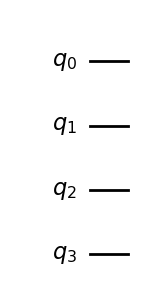

In [8]:
dj_function(3).draw()

In [9]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits-1
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qc.h(range(n+1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [10]:
from qiskit_aer import AerSimulator

def dj_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch-Jozsa function is constant or balanced.
    """
    qc = compile_circuit(function)
    
    result = AerSimulator().run(qc,shots=1,memory=True).result()
    measurements = result.get_memory()
    if '1' in measurements[0]:
        return 'balanced'
    return 'constant'

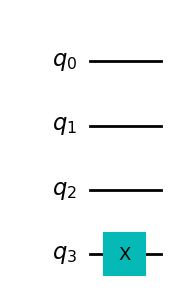

'constant'

In [11]:
f = dj_function(3)
display(f.draw())
dj_algorithm(f)

### The Bernstein-Vazirani problem

The Bernstein-Vazirani problem is another query model that is also called the _Fourier sampling problem_. First, we'll introduce some general notation:

$x \cdot y = x_{n-1}y_{n-1} \oplus ... \oplus x_0y_0$

The above refers to an operation known as the _binary dot product_ and the result is the XOR of all pairwise products. Thus, if there are an odd number of 1's in the set of pairwise products, the answer is 1; if there is an even number of 1's in the set of pairwise products, the answer is 0.

Now the Bernstein-Vazirani problem can be stated as following:

Input: a function $f : {0, 1}^n \Rightarrow {0, 1}$<br>
Promise: there exists a binary string $s = s_{n-1}...s_0$ for which $f(x) = s \cdot x$ for all $x \in \Sigma^n$<br>
Output: the string $s$

The DJ problem is another example that uses phase kickback to its advantage. Here, we can first describe the Hadamard in the following way:

$H^{\otimes n}\ket{x} = \frac{1}{\sqrt{2^n}}\Sigma (-1)^{x \cdot y}\ket{y}$

Looking at our circuit, we can describe the state right after all the Hadamards are applied as below:

$\ket{-} \otimes \frac{1}{\sqrt{2^n}}\Sigma \ket{x}$

Then once the query gate is performed, we then have:

$\ket{-} \otimes \frac{1}{\sqrt{2^n}}\Sigma (-1)^{f(x)}\ket{x}$

Using the Hadamard formula described above, the state after applying the 2nd layer of H gates is below:

$\ket{-} \otimes \frac{1}{2^n} \Sigma \Sigma (-1)^{(s \oplus y) \cdot x}\ket{y}$

where we made simplifications in the exponent of the -1. First, we replaced $f(x)$ with its computed value of $s \cdot x$. Mathematically, when two values with the same base are multipled, their exponents are added. However, we replaced $(s \cdot x) + (x \cdot y)$ with the exclusive or operator in $(s \cdot x) \oplus (y \cdot x)$ instead because this is how the an integer exponent of -1 works (even or odd). Lastly, we simplified this expression through the associative rule by factoring out the x to the right.

The very last trick here is to realize the following:

$\frac{1}{2^n}\Sigma (-1)^{z \cdot x} = \begin{cases} 1 & if z = 0^n \\ 0 & if z \neq 0^n \end{cases}$

We know this is true in the all zero's string z because the dot product will always be z with every x $\in \Sigma^n$ and thus every summation will be a positive 1. In the cases where z is _not_ the all-zero string of length n, we can verify that there is always half the values of x for which the dot product is 1 and half that it is equal to 0.

Knowing that fact above, we can look at our state and realize the following:

$\ket{-} \otimes \frac{1}{2^n}\Sigma \Sigma (-1)^{(s \oplus y) \cdot x}\ket{y} = \ket{-} \otimes \ket{s}$

because $s \oplus y = 0^n$ only if $y = s$. In other words, for every value of y not equal to s, the probabilities will equal out to 0. However, for only the correct y=s, will we see an actual probability of 1. 

The DJ circuit solves the Bernstein-Vazirani problem with a single query whereas classically, it would require at least n queries to solve. This could be done by pragmatically querying the function with n strings, each having a single 1 in each possible position, to reveal the bits of s one at a time. Thus the advantage is 1 to n queries.

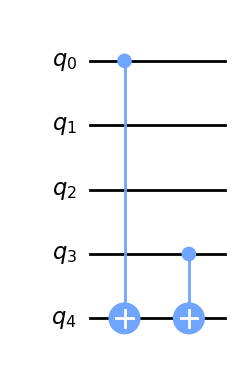

In [12]:
def bv_function(s):
    """
    Create a Bernstein-Vazirani function from a string of 1s and 0s.
    """
    qc = QuantumCircuit(len(s)+1)
    for index, bit in enumerate(reversed(s)):
        if bit == '1':
            qc.cx(index, len(s))
    return qc

bv_function('1001').draw()

In [13]:
def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc,shots=1,memory=True).result()
    return result.get_memory()[0]

bv_algorithm(
    bv_function('1001')
)

'1001'

Berstein and Vazirani _used_ the DJ algorithm to solve a more complicated problem known as the _recursiv Fourier sampling problem_. This was the first known example of a query problem where quantum algorithms had a super-polynomial advantage over probabilistic algorithms; meaning this type of solution could amplify the 1 versus n advantage of quantum algorithms to much larger. The most difficult part to show is that classical query algorithms _cannot_ solve the problem faster than lots of queries; finding creative solutions classically is quite hard.

## Simon's algorithm

Simon's algorithm is significant because it provides an exponential advantage of quantum over classical algorithms and the technique it uses inspired Peter Shor's discovery of an efficient quantum algorithm for factoring integers.

Simon's problem is given below:

Input function $f : \Sigma^n \Rightarrow \Sigma^m$ <br>
Promise: There exists a string $s \in \Sigma^n$ such that $[f(x) = f(y)] \leftrightarrow [(x=y) \lor (x \oplus s = y)]$ for all $x, y \in \Sigma^n$<br>
Output: the string $s$



The qiskit documentation does a good job explaining this but basically, this promise says 1) there is a single, unique string s to the solution, and 2) this function is a 2-to-1 function meaning that for each output in $\Sigma^m$, there must be 2 inputs of $\Sigma^n$ that are solutions where the inputs are $x$ and $x \oplus s$. 

Below is the quantum circuit diagram of Simon's algorithm where we have n qubits on top that have the Hadamard gate applied to them (twice) and m qubits on bottom that go directly into the query gate. Notice here how we won't see a phase kickback because we don't have any qubits in the $\ket{1}$ state initially. To solve this problem, the circuit will actually require being run several times followed by a classical post-processing step.

![image simon](./Simon.png)

After applying the first layer of Hadamard gates, we have the following state for the total system:

$\frac{1}{\sqrt{2^n}}\Sigma \ket{0^m}\ket{x}$

because we have m qubits in state 0 (untouched) and n qubits with the H-gate applied.

Next we apply our $U_f$, which does what it should in the fact that it applies the results onto our m bits instead of (phase) back onto the n bits. So the state is now simply:

$\frac{1}{\sqrt{2^n}}\Sigma \ket{f(x)}\ket{x}$

Then the second layer of Hadamard gates is applied:

$\frac{1}{2^n} \Sigma \Sigma (-1)^{y \cdot x}\ket{f(x)}\ket{y}$

Now lets consider the probability of measuring each instance of y observed where y is the measured value of $\Sigma^n$.

$Pr(y) = \Vert \frac{1}{2^n}\Sigma (-1)^{y \cdot x}\ket{f(x)}\Vert^2$

and we sum this for all possible values of $x \in \Sigma^n$. The big-picture view of this is to see that if our string, s, is the 0 vector, then every input has an output and thus our function is 1-to-1. What this means is that there is an equal chance for every output to be measured at all equal probabilities. On the flipside, if there is an s that is _not_ the 0 vector, then this halves our output space becuase its a 2-to-1 function. Thus, we know that we will see probabilities that are twice as high as uniform for half the values and 0 for the other half.

Therefore, we will run this circuit and measure the outputs a number of times, say k = n + 10. We will then end up with k different strings of length n that we measured from the circuit or k different results. We're going to put all these resulting measurements of y into a matrix that is k rows and n columns so each row is a sample measurement. We can then analyze this matrix to find the _null space_ of it, or the set of vectors that result in the 0 vector if you do matrix multiplication with them. Simplifying the matrix using _Gaussian elimination_ and then calculating the matrix can be relatively straight forward. Given enough sample measurements, you should be able to find the null space as the 0 vector or the 0 vector plus one additional vector, s. 

The reason we are looking for the null space of our matrix goes back to the DJ algorithm where we noticed that only the correct answer will result in a dot product of 0 which gives a positive probability. The goal is thus to find a vector, s, that will satisfy the requirement of the binary xor dot product of it and every measurement is 0.

Classically, this would take a lot of queries for the solution to be found. Simon's algorithm provides a solution that is linear in the number of input bits of our function whereas any classical algorithm, even probabilistic, needs to make a number of queries that is exponential in n.

In [14]:
# import random
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit
import numpy as np

def simon_function(s: str):
    """
    Create a QuantumCircuit implementing a query gate for Simon problem obeying the promise for the hidden string `s`
    """
    # Our quantum circuit has 2n qubits for n = len(s)
    n = len(s)
    qc = QuantumCircuit(2*n)
    
    # Define a random permutation of all n bit strings. This permutation will effectively hide the string s.
    pi = np.random.permutation(2**n)
    
    # Now we'll define a query gate explicitly. The idea is to first define a function g(x) = min{x,x ^ s}, which
    # is a simple function that satisfies the promise, and then we take f to be the composition of g and the random
    # permutation pi. This gives us a random function satisfying the promise for s.
    
    query_gate = np.zeros((4**n,4**n))
    for x in range(2**n):
        for y in range(2**n):              
            z = y ^ pi[min(x,x ^ int(s,2))]
            query_gate[x + 2**n *z, x + 2**n *y] = 1        

    # Our circuit has just this one query gate
    qc.unitary(query_gate,range(2*n))
    return qc

In [15]:
from qiskit_aer import AerSimulator
from qiskit import ClassicalRegister

def simon_measurements(problem: QuantumCircuit, k: int):
    """
    Quantum part of Simon's algorithm. Given a `QuantumCircuit` that
    implements f, get `k` measurements to be post-processed later.
    """
    n = problem.num_qubits // 2

    qc = QuantumCircuit(2*n,n)
    qc.h(range(n))
    qc.compose(problem, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    
    result = AerSimulator().run(qc,shots=k,memory=True).result()
    return result.get_memory()

In [16]:
simon_measurements(
    simon_function('11011'),
    k=12
)

['11011',
 '10010',
 '01110',
 '00111',
 '00111',
 '11111',
 '11100',
 '00000',
 '11111',
 '10010',
 '10101',
 '10001']

In [17]:
import numpy as np
import galois

def simon_algorithm(problem: QuantumCircuit):
    """
    Given a `QuantumCircuit` that implements a query gate for Simon problem, return the hidden string `s`.
    """
    
    # Quantum part: run the circuit defined previously k times and gather the measurement results.
    # Replace +10 by +r for any nonnegative integer r depending on desired confidence.

    measurements = simon_measurements(problem, k=problem.num_qubits // 2 + 10)
    print('Measurement results:')
    display(measurements)
    
    # Classical post-processing:
    
    # 1. Convert measurements of form '11101' to 2D-array of integers
    matrix = np.array([list(bitstring) for bitstring in measurements]).astype(int)   
    
    # 2. Interpret matrix as using arithmetic mod 2, and find null space
    null_space = galois.GF(2)(matrix).null_space()   
    print('Null space:')
    display(null_space)
    
    # 3. Convert back to a string
    if len(null_space) == 0:
        # No non-trivial solution; `s` is all-zeros
        return '0'*len(measurements[0])
    return ''.join(np.array(null_space[0]).astype(str))

In [18]:
simon_algorithm(
    simon_function('10011')
)

Measurement results:


['01011',
 '11010',
 '11110',
 '00011',
 '01000',
 '01011',
 '01011',
 '00011',
 '10001',
 '00100',
 '01111',
 '01100',
 '10001',
 '00000',
 '00111']

Null space:


GF([[1, 0, 0, 1, 1]], order=2)

'10011'